In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 

In [2]:
os = pd.read_csv('oscars.csv')

In [5]:
os.head(10)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98
5,5,Hollywood Revue,1928/29,Metro-Goldwyn-Mayer,Nominee,1929,130,"Comedy,Music",5.7,"2,004",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689f22d5-a700-4ce1-b9be-65652f32c186
6,6,In Old Arizona,1928/29,Fox,Nominee,1928,95,Western,5.6,"1,019",...,Rotten,56.0,9.0,Spilled,38.0,356.0,2.0,5.0,4.0,a0644f19-a136-44c2-ab5d-50978ef19608
7,7,The Patriot,1928/29,Paramount Famous Lasky,Nominee,1928,113,"Drama,History,Thriller",7.4,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5d4ef7bd-2f81-47f3-9305-2c8fe140d4e4
8,8,All Quiet on the Western Front,1929/30,Universal,Winner,1930,152,"Drama,War",8.1,"59,214",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281742f9-3b4e-480d-b704-c8c15de6b721
9,9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,"2,079",...,Fresh,75.0,8.0,Upright,69.0,323.0,0.0,6.0,2.0,297aa285-29d7-4a22-b833-c5632ab3e562


In [6]:
os.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

In [9]:
os.corr()

,Unnamed: 0,Year of Release,Movie Time,IMDB Rating,Tomatometer Rating,Tomatometer Count,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
Unnamed: 0,1.000000,0.996407,0.253731,0.346100,0.038069,0.807252,0.251869,0.086443,0.838592,0.794338,0.565235
Year of Release,0.996407,1.000000,0.242018,0.329910,0.034520,0.805810,0.238831,0.094606,0.847781,0.792311,0.567570
Movie Time,0.253731,0.242018,1.000000,0.292357,-0.188743,0.091782,0.145336,0.190135,0.114933,0.071951,0.166130
IMDB Rating,0.346100,0.329910,0.292357,1.000000,0.466360,0.268721,0.859044,0.171507,0.294503,0.279789,0.101679
Tomatometer Rating,0.038069,0.034520,-0.188743,0.466360,1.000000,0.111996,0.506349,-0.007486,0.114217,0.184758,-0.337102
Tomatometer Count,0.807252,0.805810,0.091782,0.268721,0.111996,1.000000,0.157585,0.067923,0.943635,0.990934,0.662408
Audience Rating,0.251869,0.238831,0.145336,0.859044,0.506349,0.157585,1.000000,-0.014034,0.192354,0.175147,-0.002000
Audience Count,0.086443,0.094606,0.190135,0.171507,-0.007486,0.067923,-0.014034,1.000000,0.121112,0.063454,0.065931
Tomatometer Top Critics Count,0.838592,0.847781,0.114933,0.294503,0.114217,0.943635,0.192354,0.121112,1.000000,0.937991,0.608254
Tomatometer Fresh Critics Count,0.794338,0.792311,0.071951,0.279789,0.184758,0.990934,0.175147,0.063454,0.937991,1.000000,0.555764


<AxesSubplot:>

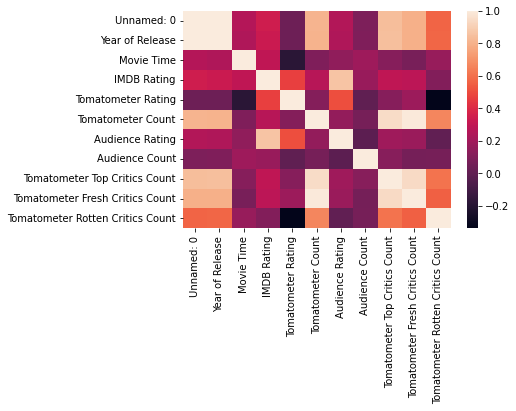

In [10]:
sns.heatmap(os.corr())

In [16]:
os = os.head(10)

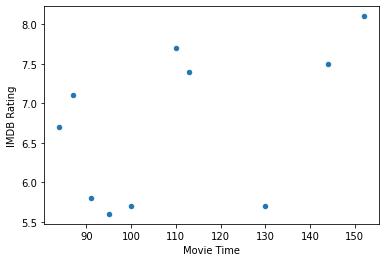

In [17]:
os.plot(kind='scatter', x='Movie Time', y='IMDB Rating')
plt.show()

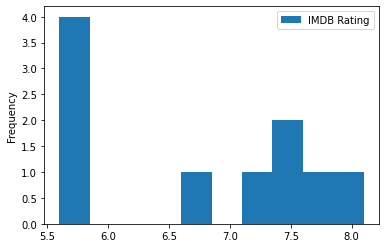

In [18]:
os.plot(kind='hist', x='Movie Time', y='IMDB Rating')
plt.show()